# Que.1:Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters.

#The inferences from the clusters obtained.

In [1]:
import pandas as pd

In [2]:
airline=pd.ExcelFile("C:\\Users\\lenovo\\Downloads\\EastWestAirlines.xlsx")

In [3]:
air1=pd.read_excel(airline,'data')
air1.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
#drop ID column
air1=air1.drop(columns='ID#',axis=1)
air1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [5]:
air1 = air1.rename(columns={'Award?':'Award'})

In [6]:
#normalization function 
def norm_func(i):
    x=(i-i.min())/(i.max() - i.min())
    return (x)

In [7]:
df_norm = norm_func(air1)

In [8]:
import scipy.cluster.hierarchy as sch

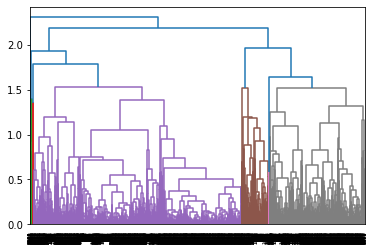

In [9]:
#creating dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

In [10]:
from sklearn.cluster import AgglomerativeClustering

In [11]:
#Creating_clusters
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'complete')

In [12]:
#Saving clusters for chart
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [13]:
Clusters.value_counts()

Clusters
0           2495
2           1144
1            325
4             31
3              4
dtype: int64

In [14]:
#Creating a copy of dataset
air2 = air1.copy()
#Adding clusters to dataset
air2['Clusters']=hc.labels_
air2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [15]:
air2.groupby('Clusters').agg(['mean']).reset_index()

,Clusters,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,59968.433667,88.883768,1.712224,1.000401,1.011222,10271.530261,9.105812,227.797194,0.656112,3825.392786,0.000802
1,1,157084.578462,208.673846,4.661538,1.000000,1.061538,70477.086154,23.249231,1019.433846,3.196923,5770.572308,1.000000
2,2,80173.963287,248.550699,2.104895,1.009615,1.000874,16882.864510,13.412587,739.958916,2.236888,4304.383741,1.000000
3,3,131999.500000,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.000000
4,4,45515.064516,32.258065,1.000000,2.483871,1.000000,14618.870968,16.129032,443.225806,1.967742,3784.258065,0.193548


In [16]:
import matplotlib.pyplot as plt

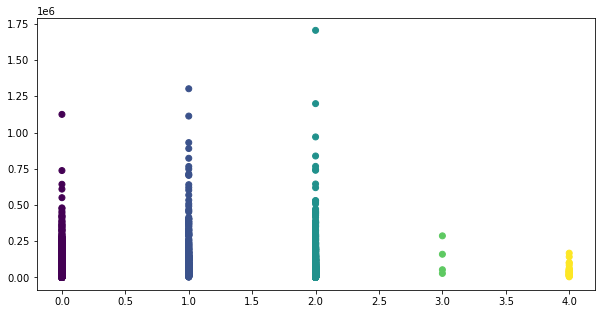

In [17]:
#Plotting_Clusters
plt.figure(figsize=(10, 5))  
plt.scatter(air2['Clusters'],air2['Balance'], c=hc.labels_)

# Kmeans clustering

#Importing liabraries for kmeans

In [18]:
from sklearn.cluster import KMeans

In [19]:
air3 = air1.copy()
air1_norm2= df_norm.copy()

In [20]:
#Using within-cluster sum-of-squares criterion (WCSS) 
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(air1_norm2)
    wcss.append(kmeans.inertia_)

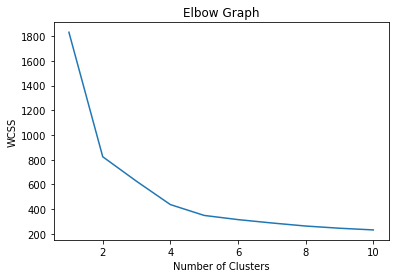

In [21]:
#Plotting K values range vs WCSS to get Elbow graph for choosing K (No. of Clusters)
plt.plot(range(1,11),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [22]:
#Cluster algorithm using K=4
clusters_4=KMeans(4,random_state=30).fit(air1_norm2)
clusters_4

KMeans(n_clusters=4, random_state=30)

In [23]:
clusters_4.labels_

array([0, 0, 0, ..., 3, 0, 0])

In [24]:
#Assigning clusters to the original data set
air3['Clusters_4_ID']=clusters_4.labels_
air3

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Clusters_4_ID
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,3
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [25]:
#Computing the centroids for K=4 clusters with 11 variables
clusters_4.cluster_centers_

array([[ 2.39011667e-02,  8.28362120e-03,  2.31945177e-02,
         8.96151819e-03,  1.05429626e-03,  1.26482465e-02,
         7.54496083e-02,  7.35308092e-03,  1.24327389e-02,
         4.36111859e-01, -5.55111512e-16],
       [ 4.89953609e-02,  2.60542873e-02,  3.90044577e-02,
         1.63447251e-02,  2.22882615e-03,  3.35642727e-02,
         1.21825219e-01,  3.34267751e-02,  5.94073285e-02,
         5.22892182e-01,  1.00000000e+00],
       [ 6.92335936e-02,  6.55837114e-03,  6.44122383e-01,
         8.05152979e-04,  5.63607085e-03,  1.18636504e-01,
         2.00595439e-01,  7.31260853e-03,  1.19405706e-02,
         5.34640411e-01, -3.33066907e-16],
       [ 6.35352962e-02,  1.77912301e-02,  7.28960396e-01,
         6.18811881e-04,  6.49752475e-03,  1.72970238e-01,
         2.34903868e-01,  2.31602349e-02,  4.04212591e-02,
         5.86139300e-01,  1.00000000e+00]])

In [26]:
#Grouping data by Clusters (k=4)
air3.groupby('Clusters_4_ID').agg(['mean']).reset_index()

,Clusters_4_ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,40747.617290,92.345809,1.092778,1.017923,1.004217,3335.152873,6.488666,226.599895,0.658935,3619.111755,0.0
1,1,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245,10.476969,1030.112927,3.148588,4338.867756,1.0
2,2,118032.061192,73.112721,3.576490,1.001610,1.022544,31282.666667,17.251208,225.352657,0.632850,4436.307568,0.0
3,3,108317.387376,198.336634,3.915842,1.001238,1.025990,45609.657178,20.201733,713.728960,2.142327,4863.439356,1.0


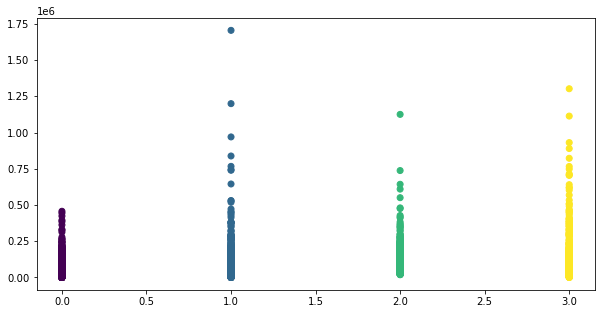

In [30]:
#Plotting Clusters
plt.figure(figsize=(10, 5))  
plt.scatter(air3['Clusters_4_ID'],air3['Balance'], c=clusters_4.labels_)

# DBSCAN

#Importing Libraries for DBSCAN

In [31]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [32]:
#Normalizing heterogenous numerical data using standard scalar fit transform to dataset
air4 = air1.copy()
air1_norm4 = StandardScaler().fit_transform(air4)

In [33]:
dbscan = DBSCAN(eps = 1, min_samples = 5).fit(air1_norm4)

In [34]:
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [35]:
air1_norm4

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [36]:
#Making clusters column
Clusters=pd.DataFrame(dbscan.labels_,columns=['clusters'])
Clusters

,clusters
0,0
1,0
2,0
3,0
4,1
...,...
3994,1
3995,1
3996,1
3997,0


In [37]:
#Adding clusters the to dataset
air4['Clusters']=dbscan.labels_
air4

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [38]:
air4.groupby('Clusters').agg(['mean']).reset_index()

,Clusters,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,184010.198556,947.731047,2.754513,1.059567,1.088448,40265.904332,22.375451,2194.700361,6.324910,4757.777978,0.691336
1,0,53298.132385,4.695558,1.658042,1.000000,1.000000,9046.818025,8.468305,133.003881,0.422165,3799.103924,0.000000
2,1,61334.918573,9.830741,2.591034,1.000000,1.000000,22886.188472,12.860018,286.425435,0.912168,4503.006404,1.000000
3,2,34806.538462,0.000000,1.000000,2.000000,1.000000,8389.769231,12.000000,19.230769,0.153846,3186.153846,0.000000
4,3,38616.166667,0.000000,1.000000,3.000000,1.000000,14966.833333,14.000000,41.666667,0.166667,3835.666667,0.000000
5,4,164883.400000,1471.600000,1.000000,1.000000,1.000000,8472.800000,5.000000,300.000000,1.400000,4173.400000,1.000000
6,5,27113.888889,2475.444444,1.000000,1.000000,1.000000,2169.111111,4.555556,44.444444,0.333333,1900.111111,0.000000


In [39]:
air4.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1


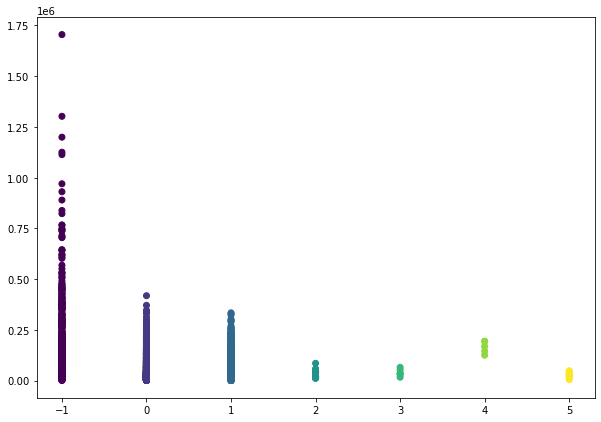

In [40]:
#Plotting Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(air4['Clusters'],air4['Balance'], c=dbscan.labels_)

# Que.2:Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify
the number of clusters formed and draw inferences.

In [41]:
import pandas as pd

In [42]:
crime=pd.read_csv("C:\\Users\\lenovo\\Downloads\\crime_data.csv")

In [43]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [44]:
crime1=crime.iloc[:,1:]
crime1.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [45]:
#Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [46]:
#Normalized data frame (considering the numerical part of data)
df_norm = norm_func(crime1.iloc[:,1:])

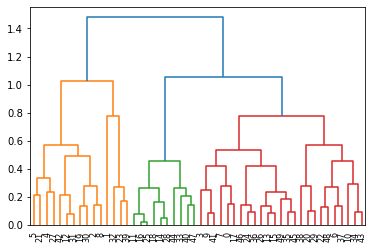

In [47]:
#creating dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

In [48]:
from sklearn.cluster import AgglomerativeClustering

In [49]:
#Creating clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')

In [50]:
#Saving clusters for chart
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [51]:
Clusters.value_counts()

Clusters
1           25
3           11
2           10
0            4
dtype: int64

In [52]:
#Creating a copy of dataset
crime2 = crime1.copy()

#Adding clusters to dataset
crime2['Clusters']=hc.labels_
crime2.head()

,Murder,Assault,UrbanPop,Rape,Clusters
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,0
2,8.1,294,80,31.0,3
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,3


In [53]:
crime2.groupby('Clusters').agg(['mean']).reset_index()

,Clusters,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,13.375000,284.500000,46.250000,25.050000
1,1,7.084000,148.040000,69.560000,19.460000
2,2,3.720000,79.400000,48.300000,11.610000
3,3,11.054545,264.090909,79.090909,32.618182


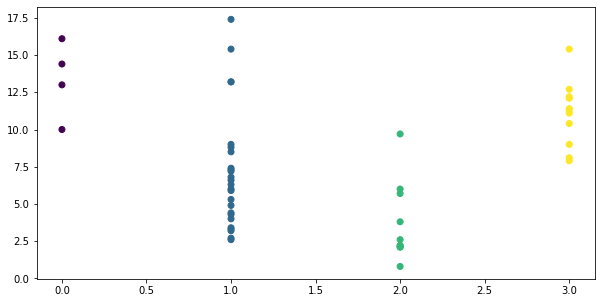

In [54]:
#Plotting Clusters
plt.figure(figsize=(10, 5))  
plt.scatter(crime2['Clusters'],crime2['Murder'], c=hc.labels_)

# K-Means clusters

In [55]:
#importing liabraries for k means clustering 
from sklearn.cluster import KMeans

In [56]:
crime3 = crime1.copy()
crime_norm2= df_norm.copy()

In [57]:
#Using within-cluster sum-of-squares criterion (WCSS) 
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(crime_norm2)
    wcss.append(kmeans.inertia_)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


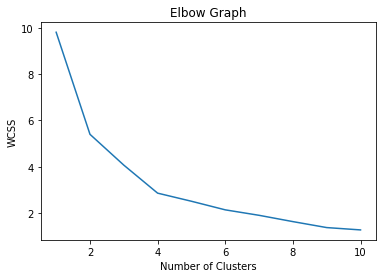

In [58]:
#Plotting K values range vs WCSS to get Elbow graph for choosing K (No. of Clusters)
plt.plot(range(1,11),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [59]:
#Cluster algorithm using K=4
clusters_4=KMeans(4,random_state=30).fit(crime_norm2)
clusters_4

KMeans(n_clusters=4, random_state=30)

In [60]:
#Assigning clusters to the original data set
crime3['Clusters_4_']=clusters_4.labels_
crime3.head()

,Murder,Assault,UrbanPop,Rape,Clusters_4_
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,3
2,8.1,294,80,31.0,3
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,3


In [61]:
#Computing the centroids for K=4 clusters 
clusters_4.cluster_centers_

array([[0.6802226 , 0.36864407, 0.36466408],
       [0.34075342, 0.71186441, 0.31983922],
       [0.11485774, 0.34028683, 0.12601868],
       [0.76961395, 0.74884438, 0.69884895]])

In [62]:
#Grouping data by Clusters (k=4)
crime3.groupby('Clusters_4_').agg(['mean']).reset_index()

,Clusters_4_,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,13.937500,243.625000,53.750000,21.412500
1,1,6.233333,144.500000,74.000000,19.677778
2,2,3.600000,78.538462,52.076923,12.176923
3,3,10.809091,269.727273,76.181818,34.345455


In [63]:
crime3

,Murder,Assault,UrbanPop,Rape,Clusters_4_
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,3
2,8.1,294,80,31.0,3
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,3
5,7.9,204,78,38.7,3
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,1
8,15.4,335,80,31.9,3
9,17.4,211,60,25.8,0


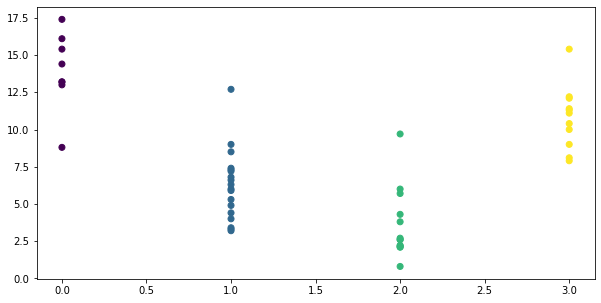

In [64]:
#Plotting Clusters
plt.figure(figsize=(10, 5))  
plt.scatter(crime3['Clusters_4_'],crime3['Murder'], c=clusters_4.labels_)

# DBSCAN

In [65]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [66]:
#Normalizing heterogenous numerical data using standard scalar fit transform to dataset
crime5 = crime1.copy()
crime_norm5 = StandardScaler().fit_transform(crime5)

In [67]:
dbscan = DBSCAN(eps = 1, min_samples = 5).fit(crime_norm5)

In [68]:
#Noisy samples are given the label -1.
dbscan.labels_

array([-1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  0, -1,  0,  0,  0,  0,
       -1,  0, -1,  1, -1,  0, -1,  0,  0,  0, -1,  0,  1, -1, -1, -1,  0,
        0,  0,  0,  0,  1, -1,  0, -1, -1,  0, -1,  0,  0,  0,  0,  0],
      dtype=int64)

In [69]:
crime_norm5

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [70]:
#Making clusters column 
Clusters=pd.DataFrame(dbscan.labels_,columns=['clusters'])
Clusters

,clusters
0,-1
1,-1
2,-1
3,-1
4,-1
5,-1
6,0
7,-1
8,-1
9,-1


In [71]:
#Adding clusters the to dataset
crime5['Clusters']=dbscan.labels_
crime5

,Murder,Assault,UrbanPop,Rape,Clusters
0,13.2,236,58,21.2,-1
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,-1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,-1


In [72]:
crime5.groupby('Clusters').agg(['mean']).reset_index()

,Clusters,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,-1,11.152174,236.913043,66.739130,27.034783
1,0,4.904167,108.625000,61.708333,16.516667
2,1,5.066667,160.666667,87.000000,14.466667


In [73]:
crime5

,Murder,Assault,UrbanPop,Rape,Clusters
0,13.2,236,58,21.2,-1
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,-1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,-1


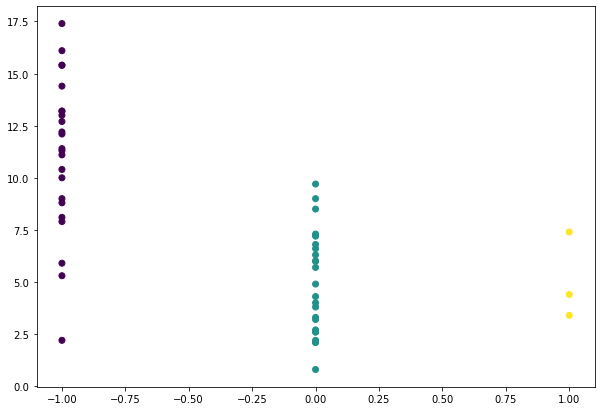

In [74]:
#Plotting Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(crime5['Clusters'],crime5['Murder'], c=dbscan.labels_)